In [1]:
import tensorflow as tf

## 卷积层实现
### 自定义权值
在 TensorFlow 中，通过 tf.nn.conv2d 函数可以方便地实现 2D 卷积运算。tf.nn.conv2d基于输入𝑿: [b,ℎ ,𝑤 ,𝑐𝑖𝑛] 和卷积核𝑾: [𝑘 𝑘 𝑐𝑖𝑛 𝑐𝑜𝑢𝑡] 进行卷积运算，得到输出𝑶 [b,ℎ′, 𝑤′ ,𝑐𝑜𝑢𝑡] ，其中𝑐𝑖𝑛表示输入通道数，𝑐𝑜𝑢𝑡表示卷积核的数量，也是输出特征图的通道数。

In [2]:
x = tf.random.normal([2,5,5,3])
w = tf.random.normal([3,3,3,4])
out = tf.nn.conv2d(x,w,strides=1,padding=[[0,0],[0,0],[0,0],[0,0]])

In [3]:
out.shape

TensorShape([2, 3, 3, 4])

其中 padding 参数的设置格式为：padding=[[0,0],[上,下],[左,右],[0,0]]  
上下左右各填充一个单位，则 padding 参数设置为[[0,0],[1,1],[1,1],[0,0]]  

In [4]:
x = tf.random.normal([2,5,5,3])
w = tf.random.normal([3,3,3,4])
out = tf.nn.conv2d(x,w,strides=1,padding=[[0,0],[1,1],[1,1],[0,0]])

In [5]:
out.shape

TensorShape([2, 5, 5, 4])

特别地，通过设置参数 padding='SAME'、strides=1 可以直接得到输入、输出同大小的卷积层，其中 padding 的具体数量由 TensorFlow 自动计算并完成填充操作.

In [13]:
x = tf.random.normal([2,5,5,3])
w = tf.random.normal([3,3,3,4])
out = tf.nn.conv2d(x,w,strides=1,padding='SAME')

In [7]:
out.shape

TensorShape([2, 5, 5, 4])

卷积神经网络层与全连接层一样，可以设置网络带偏置向量。tf.nn.conv2d 函数是没有实现偏置向量计算的，添加偏置只需要手动累加偏置张量即可。

In [8]:
# 根据[cout]格式创建偏置向量
b = tf.zeros([4])
# 在卷积输出上叠加偏置向量，它会自动 broadcasting 为[b,h',w',cout]
out = out + b

In [9]:
b.shape,out.shape

(TensorShape([4]), TensorShape([2, 5, 5, 4]))

### 卷积层类
通过卷积层类 layers.Conv2D 可以**不需要手动定义卷积核𝑾和偏置𝒃张量**，直接调用类实例即可完成卷积层的前向计算，实现更加高层和快捷。  
在 TensorFlow 中，API 的命名有一定的规律，首字母大写的对象一般表示类，全部小写的一般表示函数，如 **layers.Conv2D表示卷积层类，nn.conv2d表示卷积运算函数.**   
使用类方式会(在创建类时或 build 时)**自动创建需要的权值张量和偏置向量等**，用户不需要记忆卷积核张量的定义格式，因此使用起来更简单方便，但是灵活性也略低。   
函数方式的接口需要**自行定义权值和偏置等**，更加灵活和底层。  
在新建卷积层类时，只需要指定卷积核数量参数 filters，卷积核大小 kernel_size，步长strides，填充 padding 等即可,如果卷积核高宽不等，步长行列方向不等，此时需要将 kernel_size 参数设计为 tuple格式(𝑘ℎ 𝑘𝑤)，strides 参数设计为(𝑠ℎ 𝑠𝑤).

In [10]:
layer = tf.keras.layers.Conv2D(4,kernel_size=3,strides=1,padding='SAME')

In [11]:
layer1 = tf.keras.layers.Conv2D(4,kernel_size=(3,4),strides=(2,1),padding='SAME')

In [13]:
layer = tf.keras.layers.Conv2D(4,kernel_size=3,strides=1,padding='SAME')
out = layer(x)
out.shape 

TensorShape([2, 5, 5, 4])

在类 Conv2D 中，保存了卷积核张量𝑾和偏置𝒃，可以通过类成员 trainable_variables直接返回𝑾和𝒃的列表。  
也可以直接调用类实例 layer.kernel、layer.bias名访问𝑾和𝒃张量。

In [16]:
layer.trainable_variables

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 3, 4) dtype=float32, numpy=
 array([[[[ 0.2437422 ,  0.08774582,  0.15351939,  0.24705073],
          [ 0.11227664, -0.1016742 ,  0.21263763, -0.30423364],
          [-0.18269694, -0.02163401, -0.21902698, -0.091611  ]],
 
         [[-0.02625018, -0.14880483, -0.22838715,  0.18353176],
          [ 0.2334849 ,  0.15451592,  0.23177841, -0.23397374],
          [-0.15307483,  0.01141182, -0.15656859, -0.1619232 ]],
 
         [[ 0.17415318,  0.0223144 ,  0.09880814, -0.05945921],
          [ 0.07118085, -0.06688489,  0.2255921 , -0.14549907],
          [ 0.20877329, -0.2085037 ,  0.14816236, -0.1297698 ]]],
 
 
        [[[-0.2613098 ,  0.30639586,  0.13460332,  0.2691286 ],
          [-0.23557824,  0.0474596 ,  0.04440111, -0.20931974],
          [ 0.21925685, -0.29571152,  0.29577765, -0.01720574]],
 
         [[-0.16052338, -0.130909  ,  0.28106228,  0.14111361],
          [-0.1240409 ,  0.06575584,  0.11045045, -0.23101526],
          [ 0.

In [19]:
layer.kernel,layer.bias

(<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 3, 4) dtype=float32, numpy=
 array([[[[ 0.2437422 ,  0.08774582,  0.15351939,  0.24705073],
          [ 0.11227664, -0.1016742 ,  0.21263763, -0.30423364],
          [-0.18269694, -0.02163401, -0.21902698, -0.091611  ]],
 
         [[-0.02625018, -0.14880483, -0.22838715,  0.18353176],
          [ 0.2334849 ,  0.15451592,  0.23177841, -0.23397374],
          [-0.15307483,  0.01141182, -0.15656859, -0.1619232 ]],
 
         [[ 0.17415318,  0.0223144 ,  0.09880814, -0.05945921],
          [ 0.07118085, -0.06688489,  0.2255921 , -0.14549907],
          [ 0.20877329, -0.2085037 ,  0.14816236, -0.1297698 ]]],
 
 
        [[[-0.2613098 ,  0.30639586,  0.13460332,  0.2691286 ],
          [-0.23557824,  0.0474596 ,  0.04440111, -0.20931974],
          [ 0.21925685, -0.29571152,  0.29577765, -0.01720574]],
 
         [[-0.16052338, -0.130909  ,  0.28106228,  0.14111361],
          [-0.1240409 ,  0.06575584,  0.11045045, -0.23101526],
          [ 0.

## BatchNorm层
卷积神经网络的出现，网络参数量大大减低，使得几十层的深层网络成为可能。然而，在残差网络出现之前，网络的加深使得网络训练变得非常不稳定，甚至出现网络长时间不更新甚至不收敛的现象，同时网络对超参数比较敏感，超参数的微量扰动也会导致网络的训练轨迹完全改变。  
2015 年，Google 研究人员 Sergey Ioffe 等提出了一种参数标准化(Normalize)的手段，并基于参数标准化设计了 Batch Nomalization(简写为 BatchNorm，或 BN)层 。**BN 层的提出，使得网络的超参数的设定更加自由，比如更大的学习率、更随意的网络初始化等，同时网络的收敛速度更快，性能也更好,使得神经网络的损失函数空间更加平滑，梯度下降不容易陷入局部极值，不那么依赖权重初始化；也使得参数更新时梯度的取值范围更小，梯度更新更具可预测性，不容易出现梯度爆炸和梯度消失.** BN 层提出后便广泛地应用在各种深度网络模型上，卷积层、BN 层、ReLU 层、池化层一度成为网络模型的标配单元块，通过堆叠 Conv-BN-ReLU-Pooling 方式往往可以获得不错的模型性能。

网络层输入𝑥分布相近，并且分布在较小范围内时(如 0 附近)，更有利于函数的优化。那么如何保证输入𝑥的分布相近呢？数据标准化可以实现此目的，通过数据标准化操作可以将数据𝑥映射到𝑥̂：  
$𝑥̂=\frac{x-\mu_r}{\sqrt{\sigma_r^2+\epsilon}}$  
其中$𝜇_𝑟、𝜎_𝑟^2$来自统计的所有数据的均值和方差，𝜖是为防止出现除 0 错误而设置的较小数字，如 1e − 8。

在基于 Batch 的训练阶段,考虑Batch 内部的均值$𝜇_𝐵$和方差$𝜎_𝐵^2$：    
$𝑥̂_{train}=\frac{x_{train} ~ ~ ~ - ~ ~ \mu_B}{\sqrt{\sigma_B^2+\epsilon}}$  
并记录每个 Batch 的统计数据$𝜇_𝐵$,$𝜎_𝐵^2$，用于统计真实的全局$𝜇_𝑟、𝜎_𝑟^2$。

在测试阶段，根据记录的每个 Batch 的$𝜇_𝐵$,$𝜎_𝐵^2$估计出**所有训练数据**的$𝜇_𝑟、𝜎_𝑟^2$，将每层输入标准化：  
$𝑥̂_{test}=\frac{x_{test} ~ ~ ~ - ~ ~ \mu_r}{\sqrt{\sigma_r^2+\epsilon}}$  
上述的标准化运算并没有引入额外的待优化变量，$𝜇_𝑟、𝜎_𝑟^2$和$𝜇_𝐵$,$𝜎_𝐵^2$均由统计得到，不需要参与梯度更新。  
为什么测试阶段要使用全局的均值和方差呢？  
某一个样本经过测试时应该有确定的输出，如果在测试时也是用测试数据的means和var，那么样本的输出会随所处batch的不同，而有所差异。即batch的随机性导致了样本测试的不确定性。所以使用固定的在训练中得出的mean和var。  

上述的标准化运算并没有引入额外的待优化变量,$𝜇_𝐵$,$𝜎_𝐵^2$均由统计得到，不需要参与梯度更新。实际上，为了提高 BN 层的表达能力，BN 层作者引入了“scale and shift”技巧，将𝑥̂变量再次映射变换：  
$𝑥̃ = 𝑥̂ ∙ 𝛾 + \beta$  
其中𝛾参数实现对标准化后的𝑥̂再次进行缩放，𝛽参数实现对标准化的𝑥̂进行平移，不同的是，𝛾、𝛽参数均由反向传播算法自动优化，实现网络层“按需”缩放平移数据的分布的目的。

**如何得到全局的均值和方差呢？**  
根据训练时得到得到的每个batch的$𝜇_𝐵$,$𝜎_𝐵^2$，通过滑动平均的思想迭代更新得到全局的均值和方差：  
$𝜇_𝑟 = momentum  ∙ 𝜇_𝑟 + (1 − momentum) ∙ 𝜇_𝐵$  
$𝜎_𝑟^2 = momentum ∙ 𝜎_𝑟^2+(1 − momentum) ∙ 𝜎_𝐵^2$  
$𝜇_𝑟,𝜎_𝑟^2$初始值分别为0，1，在
TensorFlow 中，momentum 默认设置为 0.99。

需要注意的是，对于 2D 特征图输入𝑿:[b , ℎ 𝑤 𝑐 ],BN 层并不是计算每个点的$𝜇_𝐵$,$𝜎_𝐵^2$，而是在通道轴𝑐上面统计每个通道上面所有数据的$𝜇_𝐵$,$𝜎_𝐵^2$，因此$𝜇_𝐵$,$𝜎_𝐵^2$是每个通道上所有其它维度的均值和方差。

In [7]:
x=tf.random.normal([100,32,32,3])
x=tf.reshape(x,[-1,3])
ub=tf.reduce_mean(x,axis=0)
ub,x

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.00423183,  0.00289833, -0.0021715 ], dtype=float32)>,
 <tf.Tensor: shape=(102400, 3), dtype=float32, numpy=
 array([[-0.01069316, -1.4869391 ,  0.06559213],
        [-0.7466509 ,  0.14568272,  0.47498414],
        [ 1.3210725 , -1.8251016 ,  2.7887805 ],
        ...,
        [-0.6645756 , -1.6973752 ,  0.21304633],
        [ 0.4367766 ,  0.01970497, -1.5768087 ],
        [ 0.5880983 , -0.03935365,  0.17863801]], dtype=float32)>)

在 TensorFlow 中，通过 tf.keras.layers.BatchNormalization()类可以非常方便地实现 BN 层.

In [8]:
layer=tf.keras.layers.BatchNormalization()

与全连接层、卷积层不同，BN 层的训练阶段和测试阶段的行为不同，需要通过设置training 标志位来区分训练模式还是测试模式。

## 卷积变种
### 空洞卷积
普通的卷积层为了减少网络的参数量，卷积核的设计通常选择较小的 1×1 和3 × 3感受野大小。小卷积核使得网络提取特征时的感受野区域有限，但是增大感受野的区域又会增加网络的参数量和计算代价，因此需要权衡设计。  
空洞卷积(Dilated/Atrous Convolution)的提出较好地解决这个问题，空洞卷积在普通卷积的感受野上增加一个 Dilation Rate 参数，用于控制感受野区域的采样步长.**尽管 Dilation Rate 的增大会使得感受野区域增大，但是实际参与运算的点数仍然保持不变**。  
空洞卷积在不增加网络参数的条件下，提供了更大的感受野窗口。但是在使用空洞卷积设置网络模型时，需要精心设计 Dilation Rate 参数来避免出现网格效应，同时较大的Dilation Rate 参数并不利于小物体的检测、语义分割等任务。  

在 TensorFlow 中，可以通过设置 layers.Conv2D()类的 dilation_rate 参数来选择使用普通卷积还是空洞卷积。  
当 dilation_rate 参数设置为默认值 1 时，使用普通卷积方式进行运算；当 dilation_rate 参数大于 1 时，采样空洞卷积方式进行计算。

In [2]:
x = tf.random.normal([1,7,7,1])
layer = tf.keras.layers.Conv2D(1,kernel_size=3,strides=1,dilation_rate=2)
out = layer(x) 
out.shape

TensorShape([1, 3, 3, 1])

### 转置卷积
通过在输入之间填充大量的 padding 来实现输出高宽大于输入高宽的效果，从而实现向上采样的目的.

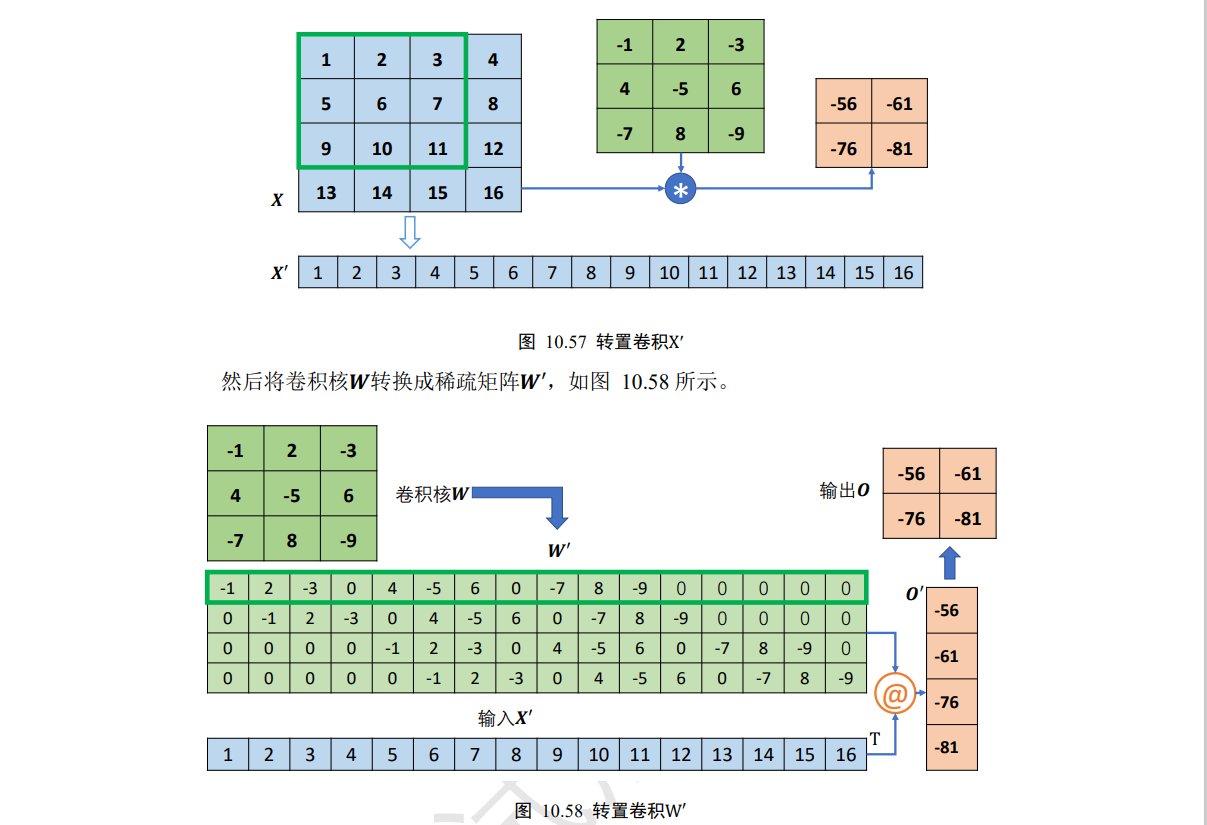

In [4]:
x = tf.range(25)+1
x = tf.reshape(x,[1,5,5,1])
x = tf.cast(x, tf.float32)
w = tf.constant([[-1,2,-3.],[4,-5,6],[-7,8,-9]])
w = tf.expand_dims(w,axis=2)
w = tf.expand_dims(w,axis=3)
print(w.shape)#[h,w,c,cout]
out = tf.nn.conv2d(x,w,strides=2,padding='VALID')
# we can use this:x->x'[1,25],w->w'(sparse matrix)[4,25] to explain, the result is w'@the Transpose of x' ,reshape to [2,2].
out

(3, 3, 1, 1)


<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[ -67.],
         [ -77.]],

        [[-117.],
         [-127.]]]], dtype=float32)>

In [9]:
x = tf.nn.conv2d_transpose(out, w, strides=2,padding='VALID',output_shape=[1,5,5,1])
# we can use this:out->out'[4,1],w->w'(sparse matrix)[4,25] to explain, the result is the transpose of out'@w' ,reshape to [5,5].
x.shape

TensorShape([1, 5, 5, 1])

在使用 tf.nn.conv2d_transpose 进行转置卷积运算时，需要额外手动设置输出的高宽。tf.nn.conv2d_transpose 并不支持自定义 padding 设置，只能设置为 'VALID' 或者 'SAME'。当设置 padding=’VALID’时，输出大小表达为：  
𝑜 = (𝑖 − 1)𝑠 + k  
当设置 padding=’SAME’时，输出大小表达为：  
𝑜 = 𝑖 ∙ s  
i 为转置卷积输入，s为步长，k为转置卷积核大小

转置卷积也可以和其他层一样，通过 tf.keraslayers.Conv2DTranspose 类创建一个转置卷积层，然后调用实例即可完成前向计算.

In [11]:
layer = tf.keras.layers.Conv2DTranspose(2,kernel_size=3,strides=1,padding='VALID')
x2 = layer(out) 
x2.shape

TensorShape([1, 4, 4, 2])

### 分离卷积
卷积核的每个通道与输入的每个通道进行卷积运算，得到多个通道的中间特征。这个多通道的中间特征张量接下来进行多个1×1卷积核的普通卷积运算，得到多个高宽不变的输出，这些输出在通道轴上面进行拼接，从而产生最终的分离卷积层的输出。可以看到，分离卷积层包含了两步卷积运算，第一步卷积运算是单个卷积核，第二个卷积运算包含了多个卷积核。  
分离卷积有什么优势呢？一个很明显的优势在于，同样的输入和输出，采用Separable Convolution 的参数量约是普通卷积的$\frac{1}{3}$

 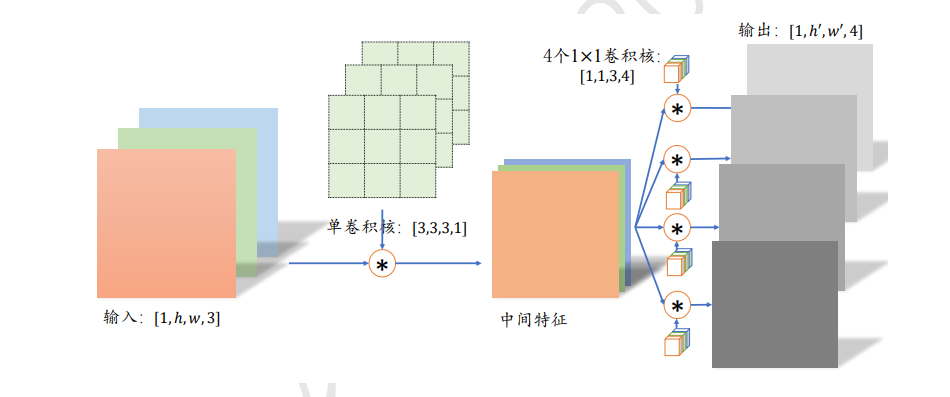